<a href="https://colab.research.google.com/github/Agnish1234/Graph_Optimizer/blob/main/network_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running Prim MST:


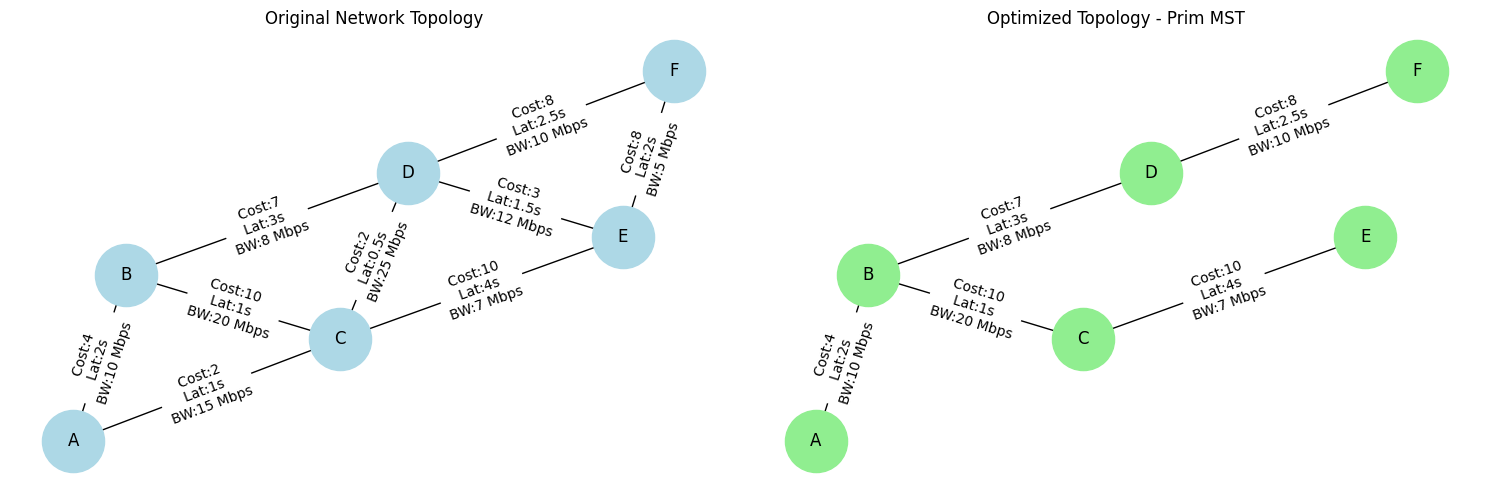

Network Performance Metrics: {'total_cost': 39, 'total_latency': 12.5, 'total_bandwidth': 55}
----------------------------------------
Running Kruskal MST:


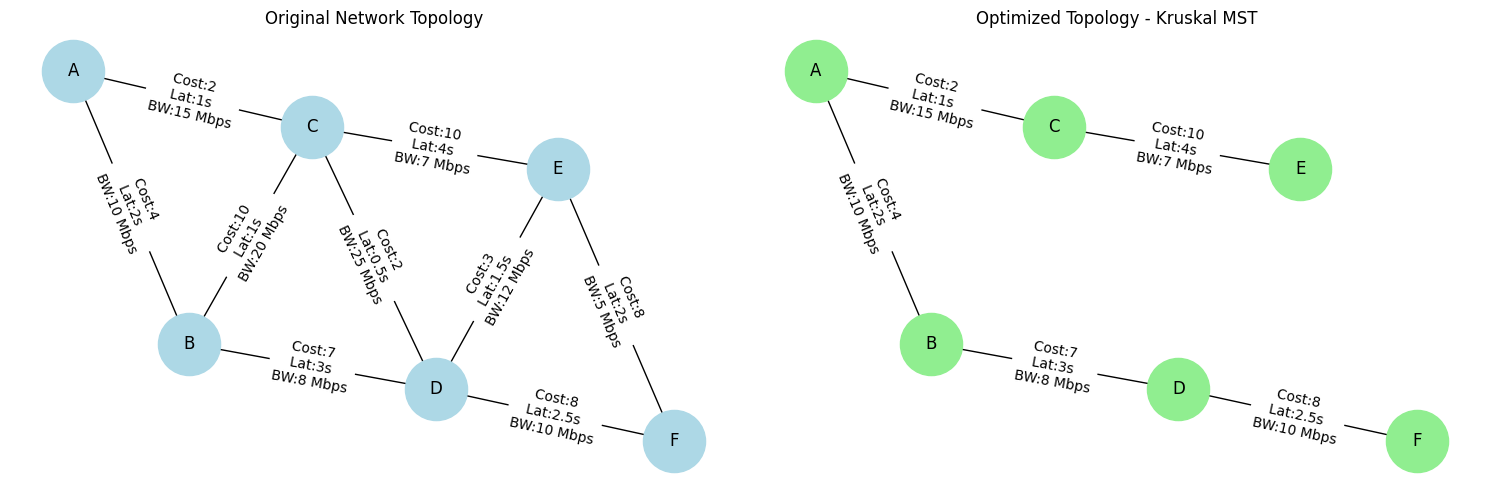

Network Performance Metrics: {'total_cost': 31, 'total_latency': 12.5, 'total_bandwidth': 50}
----------------------------------------
Running Boruvka MST:


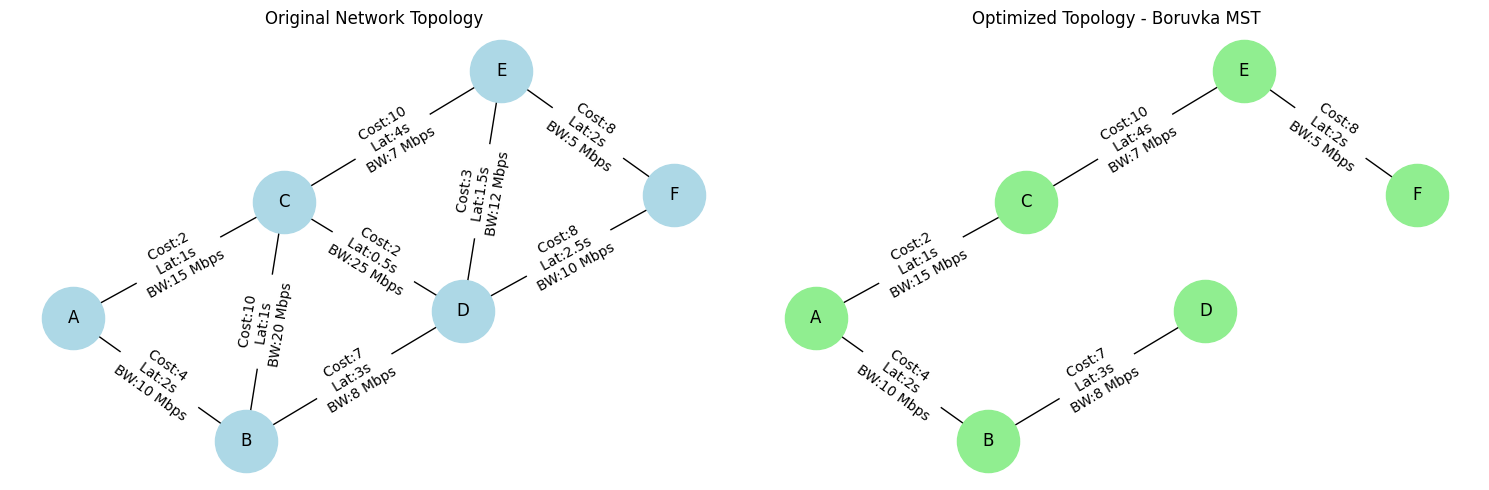

Network Performance Metrics: {'total_cost': 31, 'total_latency': 12, 'total_bandwidth': 45}
----------------------------------------
Running Bellman_ford MST:


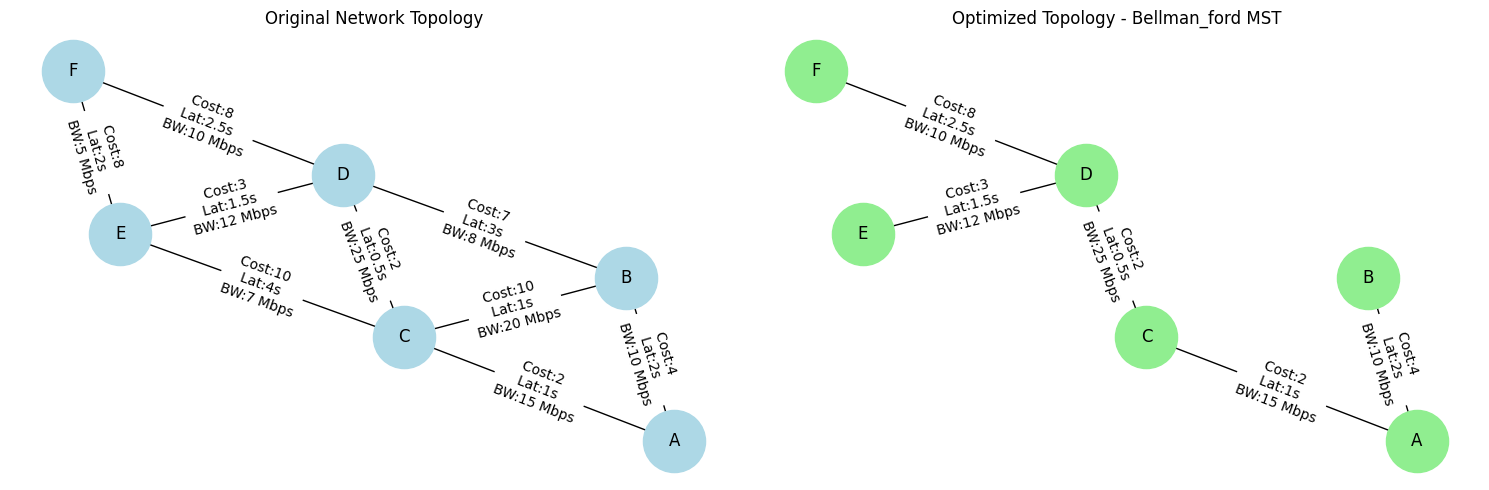

Network Performance Metrics: {'total_cost': 19, 'total_latency': 7.5, 'total_bandwidth': 72}
----------------------------------------
Running Floyd_warshall MST:


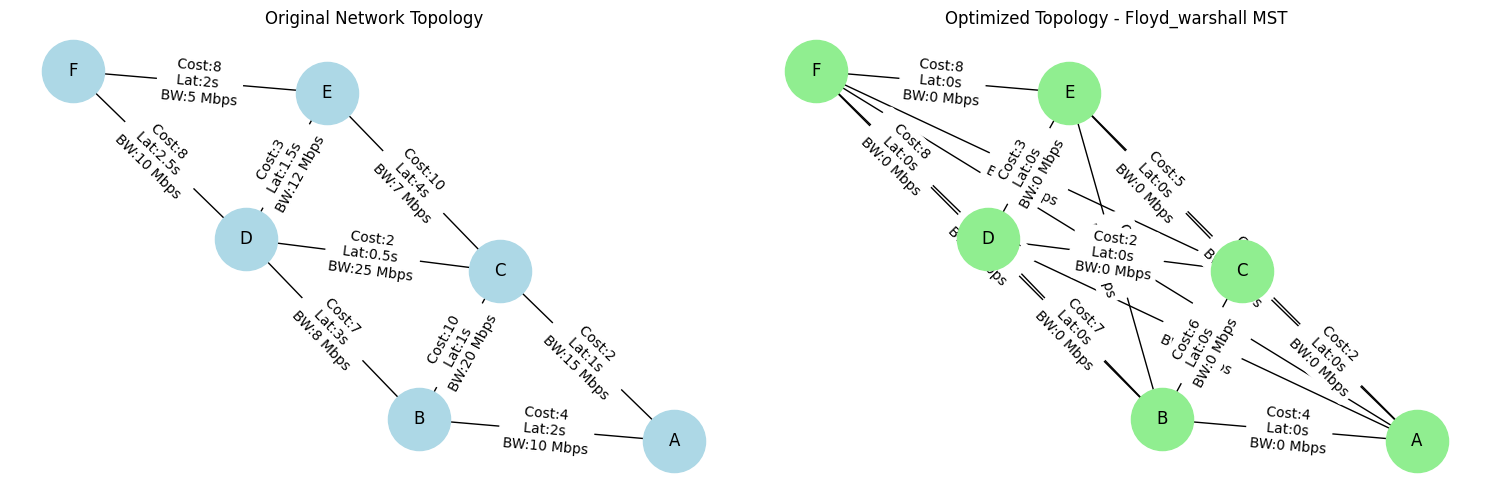

Network Performance Metrics: {'total_cost': 103, 'total_latency': 0, 'total_bandwidth': 0}
----------------------------------------
Running Dijkstra MST:


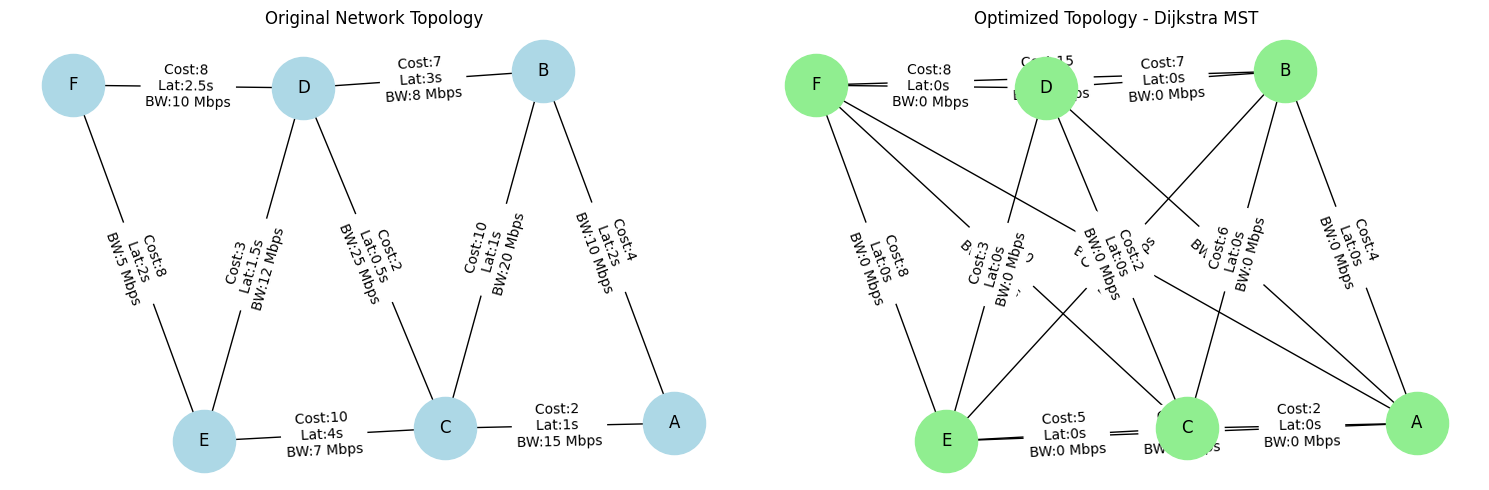

Network Performance Metrics: {'total_cost': 103, 'total_latency': 0, 'total_bandwidth': 0}
----------------------------------------
Running Floyd-Warshall Shortest Paths:
{'A': {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 3}, 'B': {'B': 0, 'A': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 2}, 'C': {'C': 0, 'A': 1, 'B': 1, 'D': 1, 'E': 1, 'F': 2}, 'D': {'D': 0, 'B': 1, 'C': 1, 'E': 1, 'F': 1, 'A': 2}, 'E': {'E': 0, 'C': 1, 'D': 1, 'F': 1, 'A': 2, 'B': 2}, 'F': {'F': 0, 'E': 1, 'D': 1, 'C': 2, 'B': 2, 'A': 3}}
----------------------------------------
Running Bellman-Ford Shortest Paths from source 'A':
Shortest Path Lengths: {'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 3}
Paths: {'A': ['A'], 'B': ['A', 'B'], 'C': ['A', 'C'], 'D': ['A', 'B', 'D'], 'E': ['A', 'C', 'E'], 'F': ['A', 'B', 'D', 'F']}
----------------------------------------
Total simulated network traffic: 86


In [ ]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import plot
import numpy as np
import random

# Function to create a graph with nodes and weighted edges
def create_graph():
    G = nx.Graph()

    # Add nodes (representing routers or computers in the network)
    nodes = ['A', 'B', 'C', 'D', 'E', 'F']
    G.add_nodes_from(nodes)

    # Add edges with weights (connection cost, latency, bandwidth)
    edges = [
        ('A', 'B', {'cost': 4, 'latency': 2, 'bandwidth': 10}),
        ('A', 'C', {'cost': 3, 'latency': 1, 'bandwidth': 15}),
        ('B', 'C', {'cost': 2, 'latency': 1, 'bandwidth': 20}),
        ('B', 'D', {'cost': 5, 'latency': 3, 'bandwidth': 8}),
        ('C', 'D', {'cost': 1, 'latency': 0.5, 'bandwidth': 25}),
        ('C', 'E', {'cost': 6, 'latency': 4, 'bandwidth': 7}),
        ('D', 'E', {'cost': 2, 'latency': 1.5, 'bandwidth': 12}),
        ('E', 'F', {'cost': 3, 'latency': 2, 'bandwidth': 5}),
        ('D', 'F', {'cost': 4, 'latency': 2.5, 'bandwidth': 10}),
    ]
    G.add_edges_from(edges)
    return G

# Function to dynamically adjust edge costs
def adjust_costs(G):
    for u, v, data in G.edges(data=True):
        data['cost'] = random.randint(1, 10)  # Randomize cost values for simulation

# Function to compute MST using a specified algorithm
def compute_mst(G, algorithm='prim'):
    if algorithm == 'prim':
        mst = nx.minimum_spanning_tree(G, algorithm='prim')
    elif algorithm == 'kruskal':
        mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
    elif algorithm == 'boruvka':
        mst = nx.minimum_spanning_tree(G, algorithm='boruvka')
    return mst

# Function to compute shortest paths using Floyd-Warshall algorithm
def floyd_warshall(G):
    # Get the shortest path between all pairs of nodes
    shortest_paths = dict(nx.all_pairs_shortest_path_length(G))
    return shortest_paths

# Function to compute shortest paths using Bellman-Ford algorithm
def bellman_ford(G, source):
    # Compute shortest path from the source to all other nodes
    length, path = nx.single_source_bellman_ford(G, source)
    return length, path

# Implementing additional MST algorithms
def bellman_ford_mst(G):
    mst = nx.Graph()
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['cost'])
    for u, v, data in edges:
        mst.add_edge(u, v, **data)
        if len(nx.cycle_basis(mst)) > 0:  # Check for cycles
            mst.remove_edge(u, v)
    return mst

def floyd_warshall_mst(G):
    mst = nx.Graph()
    dist = dict(nx.all_pairs_dijkstra_path_length(G, weight='cost'))
    nodes = list(G.nodes)
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            u, v = nodes[i], nodes[j]
            if dist[u][v] < float('inf'):
                mst.add_edge(u, v, cost=dist[u][v], latency=0, bandwidth=0)
    return mst

def dijkstra_mst(G):
    mst = nx.Graph()
    for source in G.nodes:
        distances, paths = nx.single_source_dijkstra(G, source=source, weight='cost')
        for target in paths:
            if source != target:
                mst.add_edge(source, target, cost=distances[target], latency=0, bandwidth=0)
    return mst

# Function to visualize the original graph and its MST
def visualize_graphs(G, mst, algorithm):
    plt.figure(figsize=(15, 5))

    # Plot original graph
    plt.subplot(121)
    pos = nx.spring_layout(G)  # Position nodes for consistent layout
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels={(u, v): f"Cost:{d['cost']} \nLat:{d['latency']}s \nBW:{d['bandwidth']} Mbps"
                     for u, v, d in G.edges(data=True)}
    )
    plt.title("Original Network Topology")

    # Plot MST
    plt.subplot(122)
    nx.draw(mst, pos, with_labels=True, node_size=2000, node_color='lightgreen', font_size=12)
    nx.draw_networkx_edge_labels(
        mst, pos,
        edge_labels={(u, v): f"Cost:{d['cost']} \nLat:{d['latency']}s \nBW:{d['bandwidth']} Mbps"
                     for u, v, d in mst.edges(data=True)}
    )
    plt.title(f"Optimized Topology - {algorithm.capitalize()} MST")

    plt.tight_layout()
    plt.show()

# Function to simulate traffic and analyze bandwidth usage
def simulate_traffic(G):
    total_traffic = 0
    for u, v, data in G.edges(data=True):
        traffic = random.randint(5, 15)  # Random traffic between nodes
        data['traffic'] = traffic  # Add traffic attribute
        if traffic > data['bandwidth']:
            data['traffic_exceed'] = True  # Mark as congestion
        else:
            data['traffic_exceed'] = False
        total_traffic += traffic
    return total_traffic

# Function to visualize the network interactively using Plotly
def interactive_network_plot(G):
    pos = nx.spring_layout(G)

    edge_x, edge_y = [], []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_y.append(y0)
        edge_y.append(y1)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(width=1, color='gray'), hoverinfo='none'))

    node_x, node_y, node_text = [], [], []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(node)

    fig.add_trace(go.Scatter(
        x=node_x, y=node_y, mode='markers+text', text=node_text, textposition='top center',
        marker=dict(size=20, color='skyblue')
    ))

    for u, v, data in G.edges(data=True):
        fig.add_trace(go.Scatter(
            x=[pos[u][0], pos[v][0]], y=[pos[u][1], pos[v][1]],
            mode='lines+text',
            line=dict(width=2, color='blue'),
            text=f"Cost:{data['cost']} Lat:{data['latency']}s BW:{data['bandwidth']} Mbps",
            hoverinfo='text'
        ))

    fig.update_layout(title="Interactive Network Topology", showlegend=False)
    plot(fig)

# Main execution
if __name__ == "__main__":
    algorithms = ['prim', 'kruskal', 'boruvka', 'bellman_ford', 'floyd_warshall', 'dijkstra']
    G = create_graph()
    adjust_costs(G)

    # Run MST Algorithms
    for algorithm in algorithms:
        print(f"Running {algorithm.capitalize()} MST:")
        if algorithm == 'bellman_ford':
            mst = bellman_ford_mst(G)
        elif algorithm == 'floyd_warshall':
            mst = floyd_warshall_mst(G)
        elif algorithm == 'dijkstra':
            mst = dijkstra_mst(G)
        else:
            mst = compute_mst(G, algorithm)

        visualize_graphs(G, mst, algorithm)
        metrics = {
            "total_cost": sum(d['cost'] for u, v, d in mst.edges(data=True)),
            "total_latency": sum(d['latency'] for u, v, d in mst.edges(data=True)),
            "total_bandwidth": sum(d['bandwidth'] for u, v, d in mst.edges(data=True)),
        }
        print("Network Performance Metrics:", metrics)
        print("-" * 40)

    # Run Floyd-Warshall algorithm
    print("Running Floyd-Warshall Shortest Paths:")
    shortest_paths = floyd_warshall(G)
    print(shortest_paths)
    print("-" * 40)

    # Run Bellman-Ford algorithm from source 'A'
    print("Running Bellman-Ford Shortest Paths from source 'A':")
    length, path = bellman_ford(G, 'A')
    print("Shortest Path Lengths:", length)
    print("Paths:", path)
    print("-" * 40)

    # Simulate traffic
    total_traffic = simulate_traffic(G)
    print("Total simulated network traffic:", total_traffic)

    # Interactive visualization
    interactive_network_plot(G)
